In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

In [2]:
filepath = '/kaggle/input/agriculture-crop-images/crop_images/'

In [3]:
sub_class = os.listdir(filepath)
sub_class

['jute', 'maize', 'wheat', 'sugarcane', 'rice']

In [4]:
import matplotlib.pyplot as plt

In [5]:
fig = plt.figure(figsize=(10,5))
path = os.path.join(filepath,sub_class[0])
path

'/kaggle/input/agriculture-crop-images/crop_images/jute'

<Figure size 720x360 with 0 Axes>

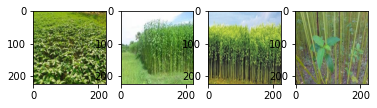

In [6]:
filenames = os.listdir(path)
filenames[:3]
j=1
for i in filenames[:4]:
    img=plt.imread(os.path.join(path,i))
    plt.subplot(240+j)
    j=j+1
    plt.imshow(img)

In [7]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

In [8]:
path_train1 = '/kaggle/input/agriculture-crop-images/crop_images/'
path_train2 = '/kaggle/input/agriculture-crop-images/kag2/'
path_train3 = '/kaggle/input/agriculture-crop-images/some_more_images/some_more_images/'


In [9]:
DataGen = ImageDataGenerator(zoom_range=0.2,horizontal_flip=True,
                             rotation_range=0.2,rescale=1/255)

In [10]:
train_gen1 = DataGen.flow_from_directory(directory=path_train1,
                                         target_size=(224,224), 
                                         batch_size=64)
train_gen2 = DataGen.flow_from_directory(directory=path_train2,
                                        target_size=(224,224),
                                        batch_size=64)
# train_gen3 = DataGen.flow_from_directory(directory=path_train3,
#                                         target_size=(224,224),
#                                         batch_size=64,
#                                         classes=['jute','maize','rice',
#                                                  'sugarcane','wheat'])

Found 201 images belonging to 5 classes.
Found 804 images belonging to 5 classes.


In [11]:
train_gen1.class_indices,train_gen2.class_indices 
#,train_gen3.class_indices

({'jute': 0, 'maize': 1, 'rice': 2, 'sugarcane': 3, 'wheat': 4},
 {'jute': 0, 'maize': 1, 'rice': 2, 'sugarcane': 3, 'wheat': 4})

In [12]:
vgg16 = VGG16(include_top=False, input_shape=(224,224,3))

2023-02-03 04:55:16.877747: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-03 04:55:16.878630: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-03 04:55:16.888931: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-03 04:55:16.889699: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-03 04:55:16.890448: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [13]:
for layer in vgg16.layers:
    layer.trainable = False

In [14]:
last_layer = Dense(5,activation='softmax')(Flatten()(vgg16.output))

In [15]:
model = Model(inputs =vgg16.input, outputs = last_layer)

In [16]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
model.fit(train_gen1,epochs=25)

2023-02-03 04:55:20.076001: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2023-02-03 04:55:22.192574: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


4/4 [==============================] - 17s 964ms/step - loss: 4.3199 - accuracy: 0.2090
Epoch 2/25
4/4 [==============================] - 3s 609ms/step - loss: 3.4378 - accuracy: 0.2786
Epoch 3/25
4/4 [==============================] - 3s 652ms/step - loss: 1.6120 - accuracy: 0.4726
Epoch 4/25
4/4 [==============================] - 3s 619ms/step - loss: 1.3530 - accuracy: 0.4925
Epoch 5/25
4/4 [==============================] - 3s 930ms/step - loss: 1.0998 - accuracy: 0.5871
Epoch 6/25
4/4 [==============================] - 3s 1s/step - loss: 1.3541 - accuracy: 0.5871
Epoch 7/25
4/4 [==============================] - 3s 793ms/step - loss: 1.2632 - accuracy: 0.6169
Epoch 8/25
4/4 [==============================] - 3s 686ms/step - loss: 1.2786 - accuracy: 0.5721
Epoch 9/25
4/4 [==============================] - 3s 626ms/step - loss: 0.6730 - accuracy: 0.7463
Epoch 10/25
4/4 [==============================] - 3s 659ms/step - loss: 1.1477 - accuracy: 0.6368
Epoch 11/25
4/4 [===============

In [19]:
model.fit(train_gen2,epochs=25)

Epoch 1/25
13/13 [==============================] - 19s 1s/step - loss: 0.3965 - accuracy: 0.8545
Epoch 2/25
13/13 [==============================] - 12s 902ms/step - loss: 0.2489 - accuracy: 0.9241
Epoch 3/25
13/13 [==============================] - 13s 918ms/step - loss: 0.3709 - accuracy: 0.8781
Epoch 4/25
13/13 [==============================] - 12s 925ms/step - loss: 0.2635 - accuracy: 0.9067
Epoch 5/25
13/13 [==============================] - 13s 958ms/step - loss: 0.1512 - accuracy: 0.9602
Epoch 6/25
13/13 [==============================] - 13s 967ms/step - loss: 0.3861 - accuracy: 0.8719
Epoch 7/25
13/13 [==============================] - 12s 945ms/step - loss: 0.0622 - accuracy: 0.9950
Epoch 8/25
13/13 [==============================] - 13s 957ms/step - loss: 0.3282 - accuracy: 0.9005
Epoch 9/25
13/13 [==============================] - 13s 973ms/step - loss: 0.0405 - accuracy: 0.9988
Epoch 10/25
13/13 [==============================] - 14s 1s/step - loss: 0.1373 - accuracy: 0.

In [20]:
# model.fit(train_gen3,epochs=15)

In [21]:
model.save('agricrop.h5')

In [22]:
import cv2

In [23]:
def get_prediction(path):
    x = cv2.imread(path)
    x = cv2.resize(x,(224,224))
    x = x.reshape(1,224,224,3)/255
    p = model.predict(x).argmax()
    return list(train_gen1.class_indices.keys())[p]

In [24]:
path_test = '/kaggle/input/agriculture-crop-images/test_crop_image/'
file_names = os.listdir(path_test)
count = 0

for file in file_names:
    names = get_prediction(path_test+file)
    print(file,names)
    if file[:3]==names[:3]:
        count+=1
print('Test_accuracy :',count/len(file_names))

maize000.jfif jute
rice-5174887_1280.jpg maize
juteplants.jpg jute
maize images.jfif maize
sugarcaneplant.jpg maize
maize corn set2.jpg maize
wheat-field-artificial-irrigation-rural-electrification-to-harvest-166395991.jpg maize
juteimg.jpg rice
wheatcropfield04.jpg sugarcane
rice-4967164_1280.jpg rice
rice-fields-204128_1280.jpg rice
jute002.jpg jute
wheatarial02.jpg maize
juteplant.jpg maize
sugarcane fields.jpg maize
sugarcaneplants.jpg maize
sugarcanefield02.jpg maize
maize plant set.jpg wheat
maizecornleaves.jfif maize
wheat-field01.jpg sugarcane
wheatcropfield.jpg wheat
jute-field.jpg jute
rice-field01.jpg jute
wheatcrop01.jpg wheat
jutefield.jpg maize
sugarcane-field8.jpg sugarcane
jute003.jpg jute
sugarcane-farm-in-the-mountain-countryside-of-thailand.jpg maize
wheat-field02.jpg wheat
jute03.jpg rice
wheat-field-395545_960_720.jpg rice
juteleaves.jpg jute
maize00corn-fields.jpg maize
maize-field01.jpg maize
rice-field02.jpg rice
wheat.jpg maize
rice8122f869e3f.jpg rice
wheatcro